In [ ]:
import pandas as pd
import torch
from torch import nn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("./rocket.motor.csv")
df1

,no.obs,streng,age
0,1,2158.70,15.50
1,2,1678.15,23.75
2,3,2316.00,8.00
3,4,2061.30,17.00
4,5,2207.50,5.00
5,6,1708.30,19.00
6,7,1784.70,24.00
7,8,2575.00,2.50
8,9,2357.90,7.50
9,10,2277.70,11.00


In [ ]:
df1 = df1.drop("no.obs", axis = 1)
df1

,streng,age
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
4,2207.50,5.00
5,1708.30,19.00
6,1784.70,24.00
7,2575.00,2.50
8,2357.90,7.50
9,2277.70,11.00


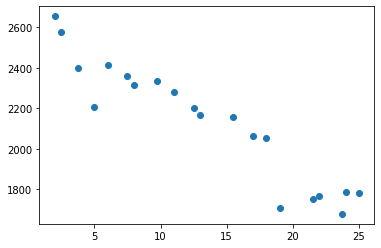

In [ ]:
plt.scatter(df1.age, df1.streng)

In [ ]:
X = torch.tensor(df1['age'].values).unsqueeze(dim=1)
torch.transpose(X,0,1)
y = torch.tensor(df1['streng'].values).unsqueeze(dim=1)

In [ ]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(16, 16, 4, 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.transform(y_train)
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_test = scaler.fit_transform(X_test)
y_test = scaler.transform(y_test)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [ ]:
X_train

tensor([[0.5778],
        [0.9444],
        [0.2444],
        [0.6444],
        [0.1111],
        [0.7333],
        [0.9556],
        [0.0000],
        [0.2222],
        [0.3778],
        [0.4667],
        [0.0556],
        [1.0000],
        [0.3222],
        [0.8667],
        [0.6889]], dtype=torch.float64)

In [ ]:
X_train.shape, y_train.shape

(torch.Size([16, 1]), torch.Size([16, 1]))

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions. 
  """
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # PLot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 10});

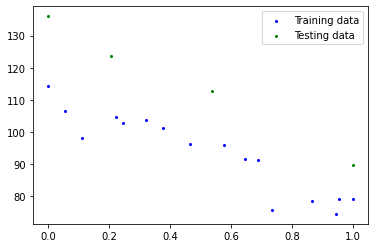

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 100000

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train.float())

  loss = loss_fn(y_pred.float(), y_train.float())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test.float())

    test_loss = loss_fn(test_pred.float(), y_test.float())
  if epoch % 10000 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 92.07028198242188 | Test loss: 114.39885711669922
Epoch: 10000 | Loss: 19.36566925048828 | Test loss: 36.51805877685547
Epoch: 20000 | Loss: 12.51618766784668 | Test loss: 27.31379508972168
Epoch: 30000 | Loss: 6.656453609466553 | Test loss: 20.897504806518555
Epoch: 40000 | Loss: 3.7143683433532715 | Test loss: 18.581390380859375
Epoch: 50000 | Loss: 3.230772018432617 | Test loss: 18.416240692138672
Epoch: 60000 | Loss: 3.195683479309082 | Test loss: 18.313304901123047
Epoch: 70000 | Loss: 3.1955718994140625 | Test loss: 18.311777114868164
Epoch: 80000 | Loss: 3.195568084716797 | Test loss: 18.311534881591797
Epoch: 90000 | Loss: 3.1955509185791016 | Test loss: 18.31315040588379


In [ ]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-34.7383]])),
             ('linear_layer.bias', tensor([112.4034]))])

In [ ]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test.float())
y_preds == y_test

tensor([[False],
        [False],
        [False],
        [False]])

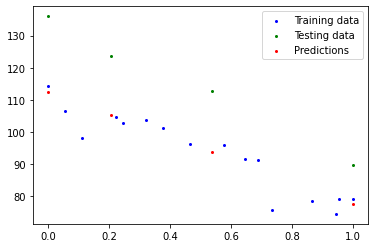

In [ ]:
plot_predictions(predictions=y_preds)